<a href="https://colab.research.google.com/github/rachelgellar/mydeeplearning/blob/main/classification_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
dir1="/content/drive/MyDrive/test/blight"
dir2="/content/drive/MyDrive/test/healthy"
dir3="/content/drive/MyDrive/validation/blight"
dir4="/content/drive/MyDrive/validation/healthy"
dir5="/content/drive/MyDrive/test/common_rust"
dir6="/content/drive/MyDrive/validation/common_rust"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn import metrics
from PIL import Image

images=[]
labels=[]

In [ ]:

for i in os.listdir(dir1)[:]:
  img=plt.imread(dir1+"/"+i)
  img=cv2.resize(img,(100,100))
  images.append(np.array(img).flatten())
  labels.append(1)

for i in os.listdir(dir3)[:]:
  img=plt.imread(dir3+"/"+i)
  img=cv2.resize(img,(100,100))
  images.append(np.array(img).flatten()) 
  labels.append(1)

for i in os.listdir(dir2)[:]:
  img=plt.imread(dir2+"/"+i)
  img=cv2.resize(img,(100,100))
  images.append(np.array(img).flatten()) 
  labels.append(0)

for i in os.listdir(dir4)[:]:
  img=plt.imread(dir4+"/"+i)
  img=cv2.resize(img,(100,100))
  images.append(np.array(img).flatten()) 
  labels.append(0)

for i in os.listdir(dir5)[:]:
  img=plt.imread(dir5+"/"+i)
  img=cv2.resize(img,(100,100))
  images.append(np.array(img).flatten())
  labels.append(2)

for i in os.listdir(dir6)[:]:
  img=plt.imread(dir6+"/"+i)
  img=cv2.resize(img,(100,100))
  images.append(np.array(img).flatten())
  labels.append(2)





In [ ]:
images = np.asarray(images)
labels = np.asarray(labels)

In [ ]:
print(images)

[[ 72  84  31 ...  80 117  15]
 [144 153 170 ... 227 194 151]
 [104 121 104 ...  57  67  32]
 ...
 [111 127  91 ...   1   1   1]
 [  0   3   0 ...   1   1   1]
 [  1   1   1 ...   1   1   1]]


In [ ]:
print(images.shape)
print(labels.shape)

(390, 30000)
(390,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(images,labels,test_size=0.3,shuffle=True)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(273, 30000)
(273,)
(117, 30000)
(117,)


In [ ]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train),1)
X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

In [ ]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(273, 100, 100, 3)
(273, 1)
(117, 100, 100, 3)
(117, 1)


In [ ]:
print(X_train[0])

[[[0.01176471 0.01176471 0.01176471]
  [0.01176471 0.01176471 0.01176471]
  [0.01176471 0.01176471 0.01176471]
  ...
  [0.01176471 0.01176471 0.01176471]
  [0.01176471 0.01176471 0.01176471]
  [0.01176471 0.01176471 0.01176471]]

 [[0.01176471 0.01176471 0.01176471]
  [0.01176471 0.01176471 0.01176471]
  [0.01176471 0.01176471 0.01176471]
  ...
  [0.01176471 0.01176471 0.01176471]
  [0.01176471 0.01176471 0.01176471]
  [0.01176471 0.01176471 0.01176471]]

 [[0.01176471 0.01176471 0.01176471]
  [0.01176471 0.01176471 0.01176471]
  [0.01176471 0.01176471 0.01176471]
  ...
  [0.01176471 0.01176471 0.01176471]
  [0.01176471 0.01176471 0.01176471]
  [0.01176471 0.01176471 0.01176471]]

 ...

 [[0.01176471 0.01176471 0.01176471]
  [0.01176471 0.01176471 0.01176471]
  [0.01176471 0.01176471 0.01176471]
  ...
  [0.01176471 0.01176471 0.01176471]
  [0.01176471 0.01176471 0.01176471]
  [0.01176471 0.01176471 0.01176471]]

 [[0.01176471 0.01176471 0.01176471]
  [0.01176471 0.01176471 0.01176471]


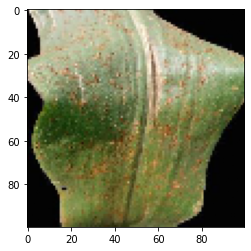

In [ ]:
import random
idex = random.randint(0, len(X_train))
plt.imshow(X_train[idex, :])
plt.show()

model


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [ ]:
  # The first two layers with 32 filters of window size 3x3
model=Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(100,100,3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 98, 98, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 49, 49, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 49, 49, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 47, 47, 64)        36928     
                                                        

In [ ]:
model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,Y_train,batch_size=256,verbose=1,epochs=50,validation_data=(X_test,Y_test))

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


2/2 [==============================] - 20s 3s/step - loss: 1.0945 - accuracy: 0.4176 - val_loss: 1.0971 - val_accuracy: 0.4786
Epoch 2/50
2/2 [==============================] - 16s 2s/step - loss: 1.2616 - accuracy: 0.3516 - val_loss: 1.1040 - val_accuracy: 0.2906
Epoch 3/50
2/2 [==============================] - 17s 2s/step - loss: 1.0986 - accuracy: 0.3516 - val_loss: 1.1044 - val_accuracy: 0.2906
Epoch 4/50
2/2 [==============================] - 16s 2s/step - loss: 1.0955 - accuracy: 0.3516 - val_loss: 1.0995 - val_accuracy: 0.3077
Epoch 5/50
2/2 [==============================] - 16s 2s/step - loss: 1.0963 - accuracy: 0.3663 - val_loss: 1.0987 - val_accuracy: 0.3162
Epoch 6/50
2/2 [==============================] - 16s 2s/step - loss: 1.0967 - accuracy: 0.4029 - val_loss: 1.0978 - val_accuracy: 0.3846
Epoch 7/50
2/2 [==============================] - 16s 2s/step - loss: 1.0983 - accuracy: 0.3260 - val_loss: 1.0966 - val_accuracy: 0.3932
Epoch 8/50
2/2 [=============================

In [ ]:
model.evaluate(X_test, Y_test)

4/4 [==============================] - 1s 345ms/step - loss: 0.5594 - accuracy: 0.7949


[0.5594147443771362, 0.7948718070983887]

predictions

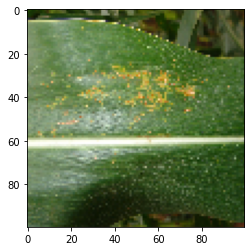

[[0.02573851 0.572278   0.40198353]]
blight


In [ ]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2,:].reshape(1,100,100,3))
print(y_pred)
index=0
m=-5
for i in range(3):
  if(y_pred[0][i]>m):
    index=i
    m=y_pred[0][i]






# import math
if index==0:
  print("healthy")
elif index==1:
  print("blight")
else:
  print("common_rust")



confusion matrix


In [ ]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(Y_test,y_pred)